### For processing Sentek drill and drop probe data and develop time series of SMC and temperature (C)

#### By : Nishadini Widanagamage
#### Date : 10/27/2024

In [1]:
# Importing models 
import pandas as pd
import os 
import matplotlib.pyplot as plt
from datetime import datetime

In [36]:
# Load all sheets from the Excel file into a dictionary of DataFrames
excel_file = r"C:\Users\nishadini\OneDrive - Kansas State University\PhD\hackathon\Datasets\24 KSU TAPS Sentek.xlsx"
sheets = pd.read_excel(excel_file, sheet_name=None, skiprows=[0, 1])  # sheet_name=None loads all sheets

# Process each sheet
for sheet_name, df in sheets.items():
    for col in df.columns:
        # Check if the column starts with "Sensor #" and if the "_moisture" column does not already exist
        if col.startswith("Sensor #") and f"{col}_moisture" not in df.columns:
            # Create a temporary variable for the decimal conversion without modifying the original column
            converted_value = df[col] / 100

            # Calculate soil moisture content in cm and add it as a new column
            df[f"{col}_moisture"] = converted_value * 10

    # Update the processed DataFrame back to the dictionary
    sheets[sheet_name] = df

# Save all modified sheets into a single Excel file
output_file = r"C:\Users\nishadini\OneDrive - Kansas State University\PhD\hackathon\Datasets\Sentek_Moisture_in_cm_All_Sheets.xlsx"
with pd.ExcelWriter(output_file) as writer:
    for sheet_name, df in sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("All sheets processed and saved successfully!")

All sheets processed and saved successfully!


In [47]:
# Define variables 
d1 = 15 # Root depth at emerging/ early vegetative stage in cm
d2 = 45 #Root depth at vegetative stages in cm
d3 = 90 #Root depth at reproductive stages in cm

# Approximate lengths of each stage in days (no irrigation will be done after cob maturity to save water)
l1 = 10 # Length of emerging/ early vegetative stage
l2 = 30 # Length of vegetative stage
l3 = 60 # Length of reproductive stage

# Soil texture was decided as Silt Loam based on soil texture file
fc = 0.35 # VWC at FC
pwp = 0.13 # VWC at PWP
mad = (fc+pwp)*0.4 # Maximum allowable depletion, 60% of available water (FC - PWP)
#print(mad)

# Required soil moisture maintenace level (fc) in cm according to stage
d1_cm = fc*d1 # for 15 cm, early stage
d2_cm = fc*d2 # 45 cm, vegetative stage
d3_cm = fc*d3 # 90 cm, reproductive stage
print(d1_cm, d2_cm, d3_cm)

5.25 15.749999999999998 31.499999999999996


In [48]:
# Plot a graph to see variations in soil  moisture content and available water
excel_file = r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets (1).xlsx"
sheets = pd.read_excel(excel_file, sheet_name= None)
#df.head()

# Process each sheet
for sheet_name, df in sheets.items():
    # Add three columns for FC (field caapcity), PWP (permenant wiliting point), and available moisture in mm
    df["FC"] = fc*d3*10 # profile depth is equal to d3 = 90 cm
    df["PWP"] = pwp*d3*10
    df["MAD"] = ((df["FC"] - df["PWP"])*0.4) + df["PWP"]
    df["AW"] = df["soil_moisture_mm"] - df["PWP"]
    
with pd.ExcelWriter(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx") as writer:
    for sheet_name, df in sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [49]:
team_3 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #3 Data")
#team_9 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #9 Data")
#team_10 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #10 Data")
#team_16 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #16 Data")
#team_17 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #17 Data")
#team_23 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #23 Data")
#team_29 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #29 Data")
#team_30 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #30 Data")
#team_32 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #32 Data")
#team_33 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #32 Data")
#team_34 = pd.read_excel(r"C:\Users\nishadini\Downloads\Sentek_Moisture_in_cm_All_Sheets_aw.xlsx", sheet_name= "Team #34 Data")

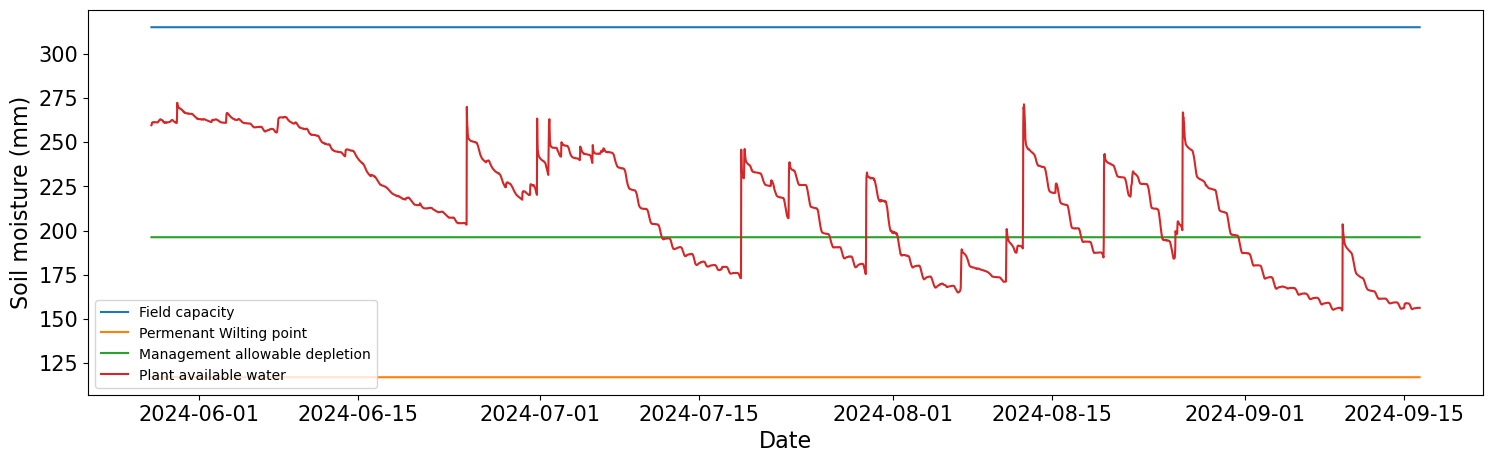

In [50]:
# Plot the graph for soil moisture 
plt.figure(figsize=(18,5))
plt.plot (team_3["Timestamp"],team_3["FC"], label = "Field capacity")
plt.plot (team_3["Timestamp"],team_3["PWP"], label = "Permenant Wilting point")
plt.plot (team_3["Timestamp"],team_3["MAD"], label = "Management allowable depletion")
plt.plot (team_3["Timestamp"],team_3["AW"], label = "Plant available water")

plt.xlabel("Date", fontsize = 16)
plt.ylabel("Soil moisture (mm)", fontsize = 16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.legend()
plt.show()


In [47]:
# Extracting calculated soil moisture values in cm into new excel file

# Read the input excel file
df_moisture = r"C:\Users\nishadini\OneDrive - Kansas State University\PhD\hackathon\Datasets\Sentek_Moisture_in_cm_All_Sheets.xlsx"
sheets = pd.read_excel(df_moisture, sheet_name=None)

# Specifying columns need to be extracted
columns_to_extract = ["Timestamp", "Sensor #1 (5 cm)_moisture", "Sensor #2 (15 cm)_moisture", "Sensor #3 (25 cm)_moisture", "Sensor #4 (35 cm)_moisture", "Sensor #5 (45 cm)_moisture", 
                      "Sensor #6 (55 cm)_moisture", "Sensor #7 (65 cm)_moisture", "Sensor #8 (75 cm)_moisture", "Sensor #9 (85 cm)_moisture"]

# Create a new Excel file to save the extracted data
output_file = "extracted_data_all_sheets.xlsx"

# Loop through each sheet and save seperately
with pd.ExcelWriter(output_file) as writer:
    # Loop through each sheet in the original Excel file
    for sheet_name, df in sheets.items():
        # Check if all columns to extract are present
        if all(col in df.columns for col in columns_to_extract):
            # Select specified columns 
            df_selected = df.loc[:, columns_to_extract].copy()
            df_selected.loc[:, 'Sheet'] = sheet_name  
            
            # Save the selected DataFrame to a new sheet in the output file
            df_selected.to_excel(writer, sheet_name=sheet_name, index=False)
        else:
            print(f"Columns not found in sheet: {sheet_name}")

print(f"Data extracted and saved to {output_file}")

Data extracted and saved to extracted_data_all_sheets.xlsx


In [54]:
# Load all sheets from the Excel file into a dictionary of DataFrames
input_file = r"C:\Users\nishadini\OneDrive - Kansas State University\PhD\workshops\extracted_data_all_sheets.xlsx"  
sheets = pd.read_excel(input_file, sheet_name=None)

# Create a new Excel file to save the extracted data
output_file = "extracted_6am_weekly_data.xlsx"

# Specify the start date for extraction
start_date = pd.to_datetime("2024-05-28")

# Use ExcelWriter to write to multiple sheets
with pd.ExcelWriter(output_file) as writer:
    # Loop through each sheet in the original Excel file
    for sheet_name, df in sheets.items():
        # Ensure the 'Timestamp' column is in datetime format
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        
        # Create a mask to filter data at 6 AM
        mask_time = (df['Timestamp'].dt.hour == 6) & (df['Timestamp'].dt.minute == 0)  
        
        # Create a mask for weekly data starting from the specified date
        mask_date = (df['Timestamp'] >= start_date) & (df['Timestamp'].dt.dayofweek == 1) 
        
        # Combine both masks
        final_mask = mask_time & mask_date
        
        # Extract the filtered DataFrame
        df_filtered = df[final_mask]

        # Save the filtered DataFrame to a new sheet in the output file
        if not df_filtered.empty:
            df_filtered.to_excel(writer, sheet_name=sheet_name, index=False)
        else:
            print(f"No data found for 6 AM weekly on Mondays in sheet: {sheet_name}")

print(f"Data extracted and saved to {output_file}")

Data extracted and saved to extracted_6am_weekly_data.xlsx


In [3]:
# Calculate required irrigation amount in cm weekly

# Load all sheets from the Excel file into a dictionary of DataFrames
input_file = r"C:\Users\nishadini\OneDrive - Kansas State University\PhD\workshops\extracted_6am_weekly_data.xlsx"
sheets = pd.read_excel(input_file, sheet_name=None)

# Define planting date and final irrigation date
planting_date = pd.to_datetime("2024-05-08") # All the teams with Sentek probes have planted on 5/08 except team 29. Therefore, 5/08 was choosen. 
final_irrigation_date = pd.to_datetime("2024-09-11")

# Define soil moisture thresholds and depths based on crop age
age_thresholds = [
    {"max_age": l1, "depth": ["Sensor #1 (5 cm)_moisture", "Sensor #2 (15 cm)_moisture"], "target_moisture": d1_cm},
    {"max_age": l2, "depth": ["Sensor #1 (5 cm)_moisture", "Sensor #2 (15 cm)_moisture", "Sensor #3 (25 cm)_moisture", 
                              "Sensor #4 (35 cm)_moisture", "Sensor #5 (45 cm)_moisture"], "target_moisture": d2_cm},
    {"max_age": l3, "depth": ["Sensor #1 (5 cm)_moisture", "Sensor #2 (15 cm)_moisture", "Sensor #3 (25 cm)_moisture", 
                              "Sensor #4 (35 cm)_moisture", "Sensor #5 (45 cm)_moisture", "Sensor #6 (55 cm)_moisture", 
                              "Sensor #7 (65 cm)_moisture", "Sensor #8 (75 cm)_moisture", "Sensor #9 (85 cm)_moisture"], 
     "target_moisture": d3_cm},]

# Create an output dictionary to store the irrigation requirements per sheet
irrigation_requirements = {}

# Iterate through each sheet to process the data
for sheet_name, df in sheets.items():
    # Makesure the 'Timestamp' column is in datetime format
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Filter data up to the final irrigation date
    df = df[df['Timestamp'] <= final_irrigation_date]
    
    # Initialize a list to store results for the current sheet
    results = []
    
    # Iterate over each date in the data
    for i, row in df.iterrows():
        date = row['Timestamp']
        # Calculate crop age in days
        crop_age = (date - planting_date).days  
        
        # Determine the appropriate depth and target moisture based on crop age
        for age_range in age_thresholds:
            if crop_age <= age_range["max_age"]:
                selected_depths = age_range["depth"]
                target_moisture = age_range["target_moisture"]
                break
        
        # Calculate cumulative soil moisture for the selected depths
        cumulative_moisture = row[selected_depths].sum()
        
        # Calculate required irrigation if the cumulative moisture is below the target
        irrigation_needed = max(0, target_moisture - cumulative_moisture)
        
        # Calculate moisture variation (allowing for both positive and negative values)
        moisture_variation = target_moisture - cumulative_moisture
        
        # Store the results
        results.append({
            "Date": date,
            "Crop Age (days)": crop_age,
            "Cumulative Soil Moisture (cm)": cumulative_moisture,
            "Target Soil Moisture (cm)": target_moisture,
            "Irrigation Required (cm)": irrigation_needed,
            "Moisture Variation (cm)": moisture_variation})
    
    # Convert results to a DataFrame and store in the dictionary
    irrigation_requirements[sheet_name] = pd.DataFrame(results)

# Save the irrigation requirements for each sheet to a new Excel file
output_file = "irrigation_requirements_1.xlsx"
with pd.ExcelWriter(output_file) as writer:
    for sheet_name, df in irrigation_requirements.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Irrigation requirements calculated and saved to {output_file}")

Irrigation requirements calculated and saved to irrigation_requirements_1.xlsx
